In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA


In [84]:
#warnings
import warnings
warnings.filterwarnings("ignore")


In [85]:
data = pd.read_csv(r'C:/Projeler/Göğüs kanseri/cancer.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [86]:
data.drop(['Unnamed: 32','id'], inplace = True, axis = 1)
data = data.rename(columns = {"diagnosis":"target"})
data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='target', ylabel='count'>

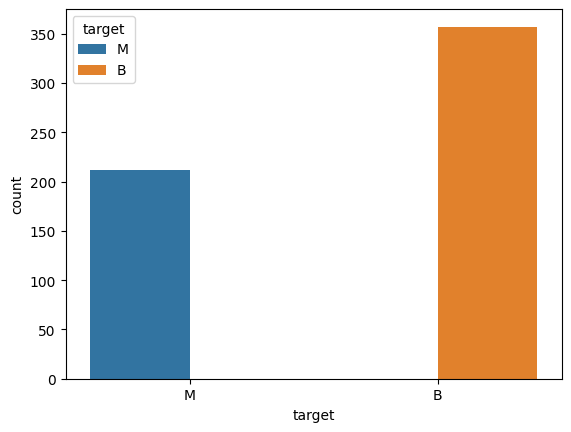

In [87]:
sns.countplot(x=data.target,hue=data["target"])

In [88]:
data["target"] = [1 if i.strip() =="M" else 0 for i in data.target]
print(len(data))


569


In [89]:
data.head()


,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [90]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
target,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


<Axes: >

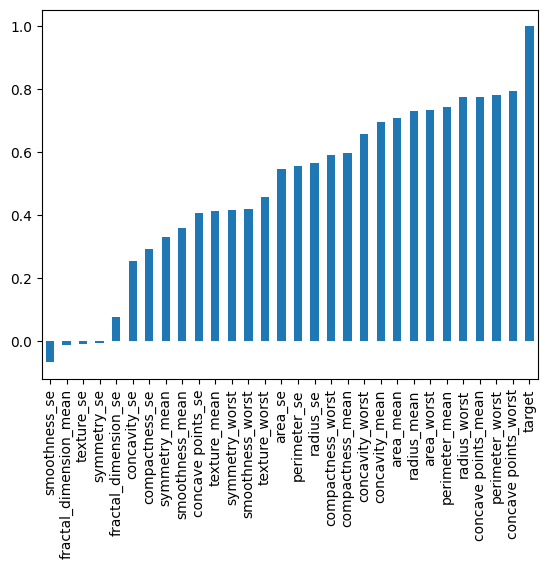

In [91]:
# internetten bakılacak
data.corr()["target"][:-1].sort_values().plot(kind = "bar")

Eğer iki özellik arasında korelasyon 1 ise bu iki özellik birbirleriyle doğru orantılıdır.Eğer bu ilişki -1 ise bu iki özellik birbirleriyle ters orantılıdır.Bu matriste birbirlerine en yakın özellikleri görebiliriz.Örneğin redius_mean ile area_mean birbirleriyle ilişkileri vardır.Buradan çıkarılan sonuç algoritmayı eğitirken redius mean ile area mean'nın katkıları aynı olacaktır.Birbirleriyle daha az ilişkisi olan özellikleri öğrenme algoritmasında kullanırsak daha iyi bir sonuç elde edebiliriz.Bu matrix biraz karışık olduğu için bir filtre koyup daha anlaşılır bir hale getirmeye çalışalım

Text(0.5, 1.0, 'Özellik arasındaki korelasyon filtre 0.75')

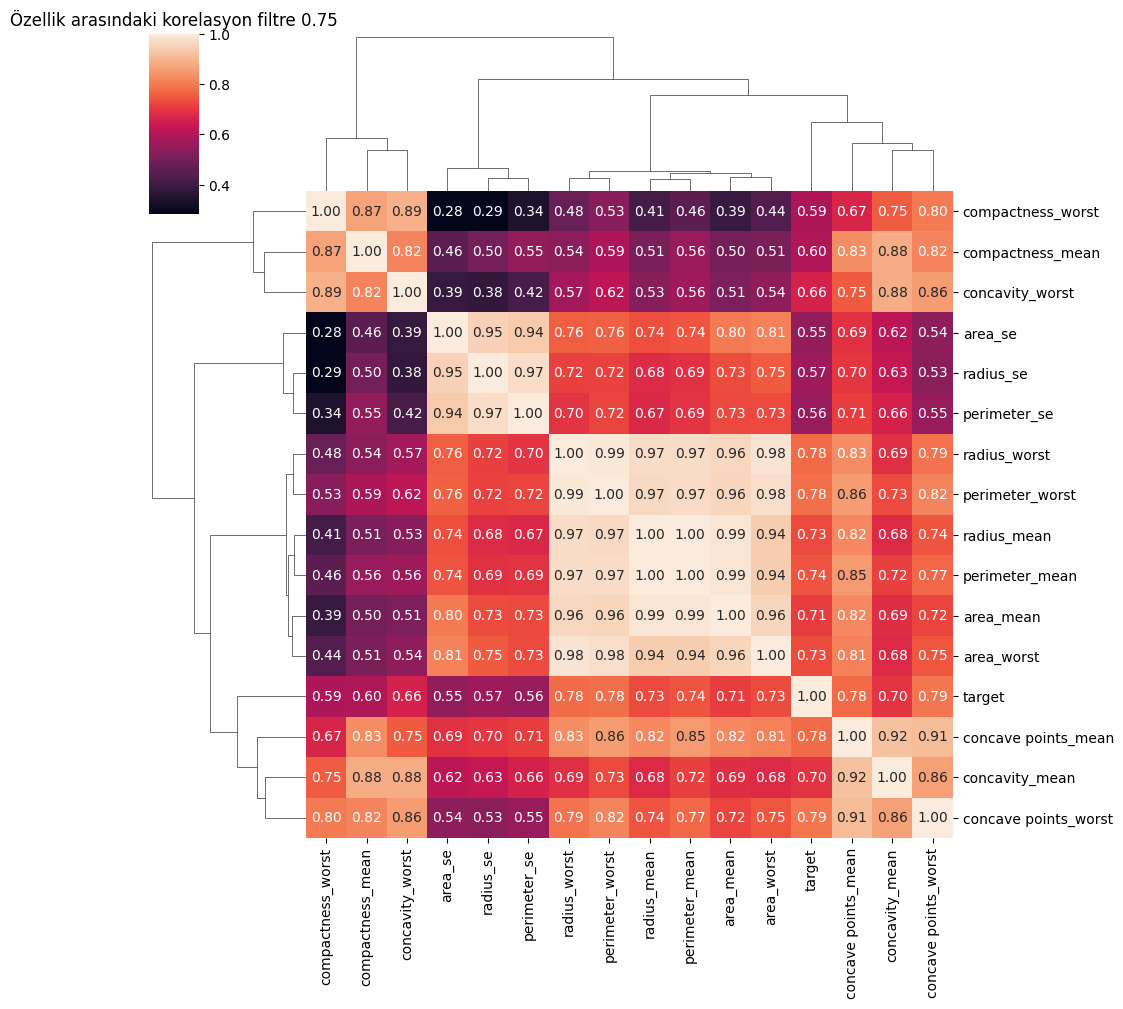

In [92]:
# %% Keşifsel Veri Analizi

#Corelasyon Matrisi

corr_matrix = data.corr()
threshold = 0.50
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Özellik arasındaki korelasyon filtre 0.75")

Burada filtre kullanalara korelasyon matrix'simizi daha rahat okuyabiliyoruz ve target değerimizin 4 tane özellik ile yüksek ilişkili olduğunu görüyoruz.

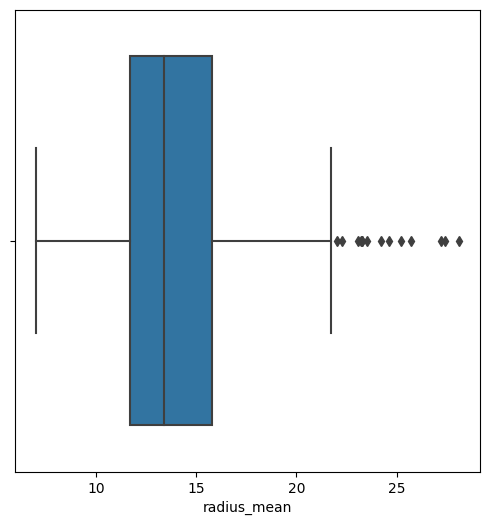

In [93]:
plt.figure(figsize=(6, 6))

sns.boxplot(x ='radius_mean', data=data)

# plt.yticks(list(range(0, 18, 2)))
plt.show()
#baklıcak

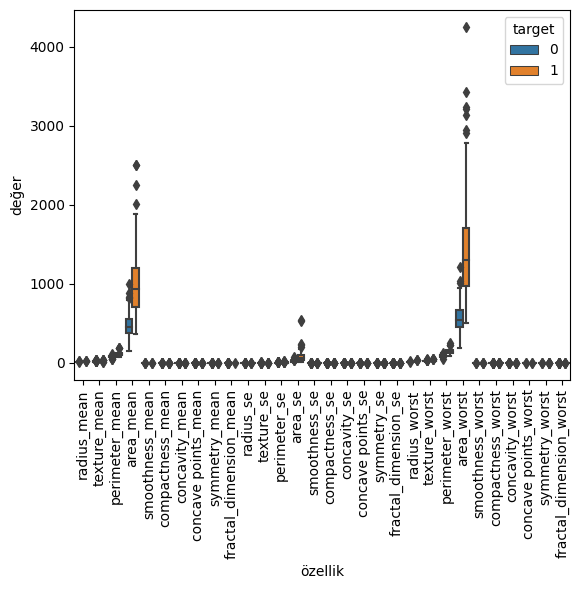

In [94]:
#box plot # düzeltielcek
data_melted = pd.melt(data, id_vars = "target",
                      var_name = "özellik",
                      value_name = "değer")

plt.figure()
sns.boxplot(x = "özellik", y = "değer", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

Box plot çizdirdik fakat bu plottan anlam çıkaramıyoruz çünkü değerler çok yüksek bu plottan anlam çıkarmak için veriyi standardization işlemini yapmamız gerekiyor.İleride bu kısıma tekrar dönüş yapılacak.

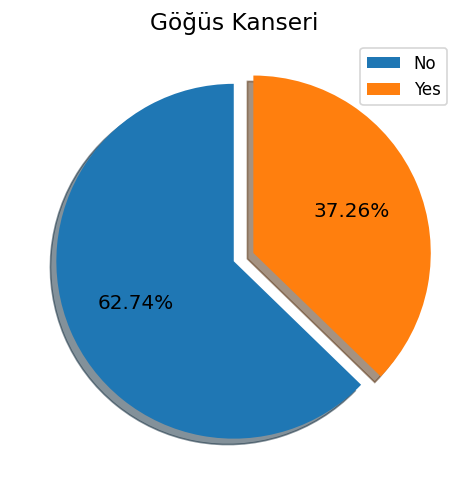

In [95]:
survived = data['target'].replace({0:'No', 1:'Yes'}).value_counts()

plt.figure( dpi = 120)
plt.pie(survived.values, labels=survived.index,
          startangle=90, autopct="%1.2f%%",
          labeldistance=None, textprops={'fontsize':12}, shadow=True, 
          explode=[0, 0.12])

plt.legend()
plt.title('Göğüs Kanseri', fontsize = 14)
plt.show()

In [17]:
# sns.pairplot(data[corr_features],diag_kind = "kde", markers = "+", hue = "target")
#plt.show()

Buradaki mavi ve turuncu kısımlar sınıfları ifade ediyor.Bu tabloya bakıldığında aslında sınıflar arasında çok fazla bir karışma söz konusu değildir.Buradaki filtre değerini 50 yaptığımız zaman tablolara baktığımız zaman tam gausyen dağlımına uymamaktır ve tablolara dikkatlı bakıldığında sağa doğru bir kuyruk söz konusu oldğu için pozitif bir çarpıklık vardır ve bu çarpıklık aykırı değer bulunurken giderilmelidir.Aykırı değer skew()>1 ise pozitif skew()<-1 ise negatif çarpık değer denebilir.

Çarpıklık

In [96]:
y = data.target
x = data.drop(["target"],axis = 1)
columns = x.columns.tolist()



In [98]:
#çarpıklık 
#aykırı değer
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
outlier_score.head()


,score
0,-1.422440
1,-1.066782
2,-0.978948
3,-1.596933
4,-1.069936


Buradaki aykırı değerleri bulmak için yoğunluk tabanı aykırı tespit sisteminin içinde bulunan local outlier factor(yerel aykırı faktör) yöntemi kullanıldı. Bu yönteme göre eğer LOF > 1 ise aykırı değer LOF < 1 inlier değer olarak adlandırılıyor.

Buradakı y pred değeri bizim vermizin aykırı değer olup olmadığını kontrol ediyor.Buradaki veriler aykırı değer skorlarına baktığımız zaman clf.negative_outlier_factor_ komutunu kullandığımız için - değerleri -1.5 değerinden küçük değerlere bakmamız gerekiyor.Normalde 569 tane verimizolduğu için buradaki yaklaşık 30 değerin hepsini çıkarmamız makul gözükmüyor veri kaybına gerek olmadğı düşünülüyor.

In [101]:
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()


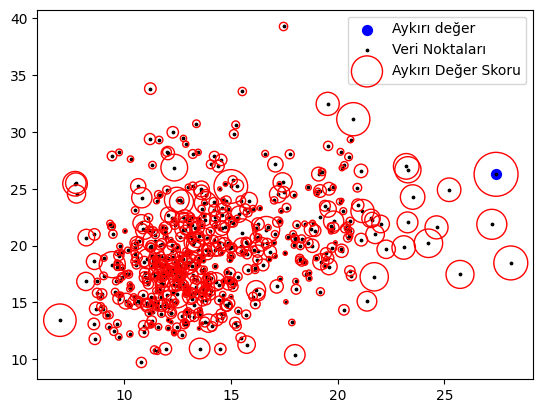

In [102]:
plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1], color = "blue" , s = 50, label = "Aykırı değer")
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = "k", s = 3, label = "Veri Noktaları")

radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0], x.iloc[:,1], s = 1000*radius, edgecolors = "r", facecolors = "None", label = "Aykırı Değer Skoru")
plt.legend()
plt.show()


Buradaki grafiğe baktığımızda aykırı değer olmaya en yakın nokta mavi ile işaretlenmiş olan noktadır.Buradaki filtre değeri ne kadar düşürülürse mavi nokta sayısı artış gösterecektir.Model eğiltildikten sonra tekrar dönüş yapılması daha sağlıklı olacaktır.

In [103]:
#Aykırı değerlerin çıkarılması
X = x.drop(outlier_index)
y = y.drop(outlier_index).values


In [104]:
test_size =0.3
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size, random_state = 42)

In [105]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Area mean çok yükseti şimdi standartize hale geldi ve değeri düştü.

In [106]:
X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df.head()
X_train_df["target"] = y_train

Gerekli perfomans sağlanmazsa dönüp tekrar outlier işlemleri yapılabilir.

In [107]:
# Basit knn metodu
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
score = knn.score(X_test,y_test)


In [108]:
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['Kanserli ' , 'Sağlıklı '],
                         columns =['Kanserli Tahmini' , 'Sağlıklı Tahmini'])
confusion.head()

,Kanserli Tahmini,Sağlıklı Tahmini
Kanserli,59,3
Sağlıklı,4,105


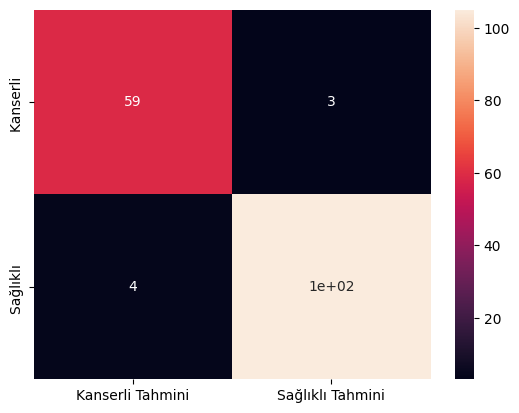

In [109]:
sns.heatmap(confusion, annot=True,); 


In [110]:
print(classification_report(y_test , y_pred))                                                                

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       109
           1       0.94      0.95      0.94        62

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [111]:
 # en iyi parametreleri bulma
k_range = list(range(1,31))
# weight_options = ["uniform", "distance"]
param_grid = {"n_neighbors" : k_range} #, "weights" : weight_options} 


In [112]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 5, scoring = "accuracy")
grid.fit(X_train, y_train)
print("En iyi deneme skoru: {} değerlere göre: {}".format(grid.best_score_ , grid.best_params_))



En iyi deneme skoru: 0.959620253164557 değerlere göre: {'n_neighbors': 3}


In [113]:
grid.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [114]:
grid.cv_results_["mean_test_score"]

array([0.92686709, 0.94952532, 0.95962025, 0.95958861, 0.94949367,
       0.95202532, 0.94702532, 0.94955696, 0.94955696, 0.95202532,
       0.94949367, 0.95708861, 0.95455696, 0.95455696, 0.95708861,
       0.95455696, 0.95455696, 0.95455696, 0.95202532, 0.95205696,
       0.95205696, 0.94952532, 0.94955696, 0.94699367, 0.94449367,
       0.94699367, 0.94699367, 0.94699367, 0.94699367, 0.94699367])

Text(0.5, 1.0, 'weight = uniform ')

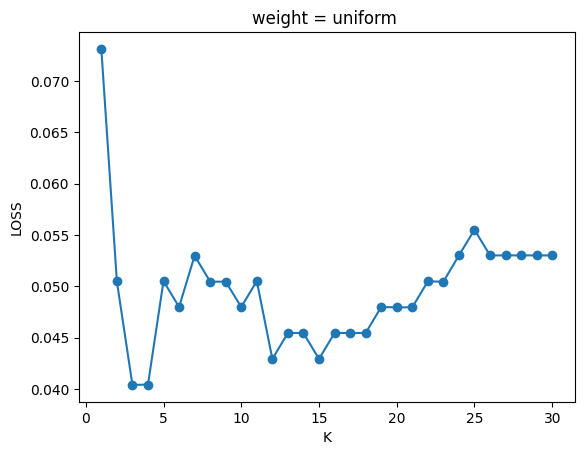

In [115]:
scores = grid.cv_results_['mean_test_score']
plt.plot(list(range(1,31)),1- scores,'o-')
plt.xlabel("K")
plt.ylabel("LOSS")
plt.title("weight = uniform ")

In [116]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)


In [117]:
cm_test = confusion_matrix(y_test, y_pred_test)
cm_train = confusion_matrix(y_train, y_pred_train)

acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)
print("Test skoru: {}, \nEğitim skoru: {}".format(acc_test,acc_train))
print("Cm Test: \n ",cm_test)
print("Cm Train: \n ",cm_train)

Test skoru: 0.9707602339181286, 
Eğitim skoru: 0.9722921914357683
Cm Test: 
  [[107   2]
 [  3  59]]
Cm Train: 
  [[248   0]
 [ 11 138]]


In [118]:
grid.best_params_

{'n_neighbors': 3}

In [119]:
from sklearn.svm import SVC
svc_model = SVC()

In [120]:
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion

,Kanserli Tahmini,Sağlıklı Tahmini
Kanserli,59,3
Sağlıklı,4,105


<Axes: >

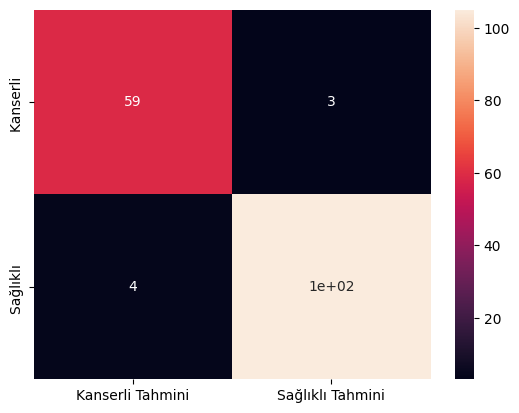

In [121]:
sns.heatmap(confusion, annot=True)

In [123]:
print(classification_report(y_test , y_pred))  #model katsayıları modeli ne kadar etkiliyor araştır fauture importants

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       109
           1       0.95      0.95      0.95        62

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [124]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=50)

In [125]:
error_rates = []

for n in range(1,96):
    
    model = GradientBoostingClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

In [126]:
print(np.argmin(error_rates))

68


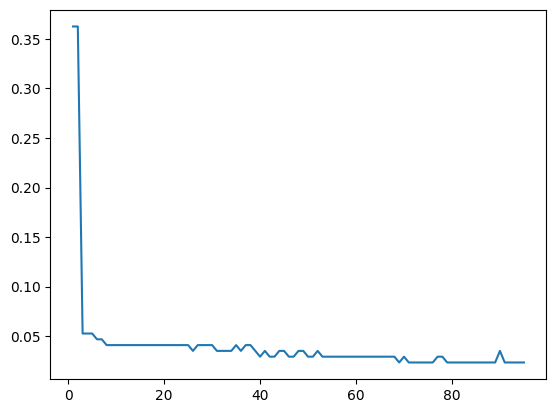

In [127]:
plt.plot(range(1,96),error_rates);

In [128]:
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

In [129]:
model_acc = accuracy_score(y_test,model_pred)
print('Classification Report: \n' + str(classification_report(y_test, model_pred)))

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.97      0.97      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
#best_df = pd.DataFrame( X[X.columns[features]], columns = X.columns[features])
#best_df.head()

In [111]:
# best_df.to_csv("Best features.csv",index=None)

In [148]:
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime as dt
st=dt.now()
randomforest = RandomForestClassifier(n_estimators = 18,random_state = 42)
randomforest.fit(X_train, y_train)
print("Time taken to complete random search: ",dt.now()-st)
random_pred = randomforest.predict(X_test)


Time taken to complete random search:  0:00:00.072002


In [149]:
rmacc = accuracy_score(y_test, random_pred)
print('Classification Report: \n' + str(classification_report(y_test, random_pred)))

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       109
           1       0.92      0.94      0.93        62

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [137]:
randomforest.feature_importances_

array([0.06693338, 0.01291039, 0.05756725, 0.035535  , 0.00265766,
       0.0212624 , 0.06111911, 0.11644512, 0.00284753, 0.00829141,
       0.0160138 , 0.00412147, 0.00719254, 0.09513747, 0.00621866,
       0.00432683, 0.00765063, 0.00443079, 0.00277239, 0.00770247,
       0.05167673, 0.02071451, 0.09019207, 0.03094523, 0.00671967,
       0.0322562 , 0.06000758, 0.13944371, 0.0199591 , 0.00694889])

In [138]:
feats = pd.DataFrame(index=X.columns,data=randomforest.feature_importances_,columns=['Importance'])
feats.tail()

,Importance
compactness_worst,0.032256
concavity_worst,0.060008
concave points_worst,0.139444
symmetry_worst,0.019959
fractal_dimension_worst,0.006949


In [139]:
imp_feats = feats[feats['Importance']>0.015]
len(imp_feats)

16

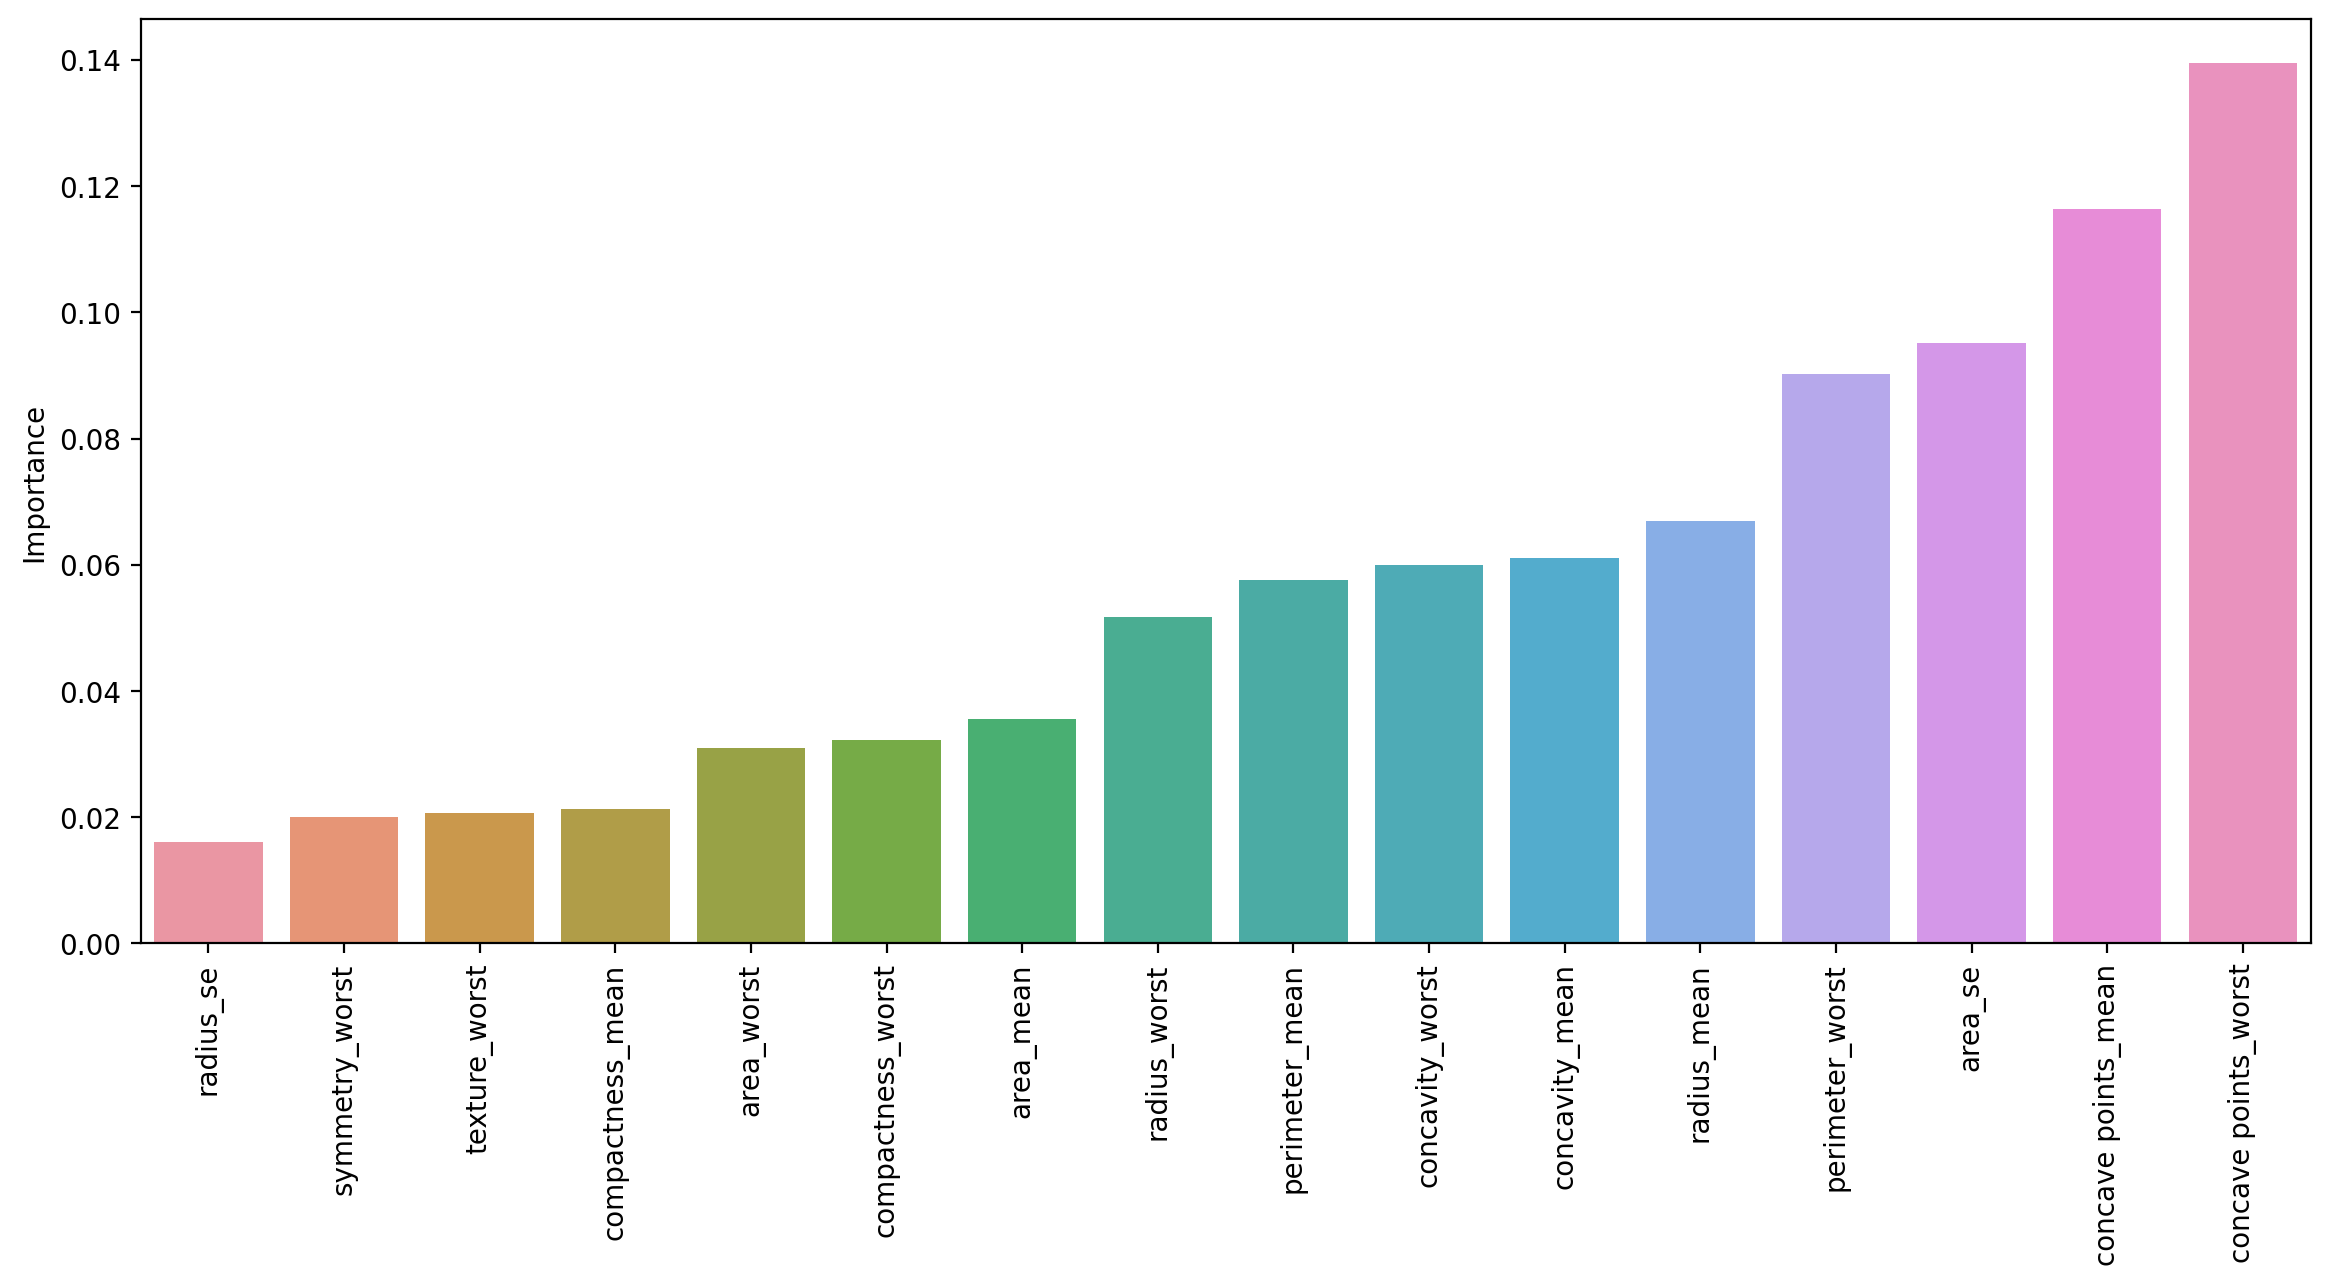

In [140]:
imp_feats = imp_feats.sort_values("Importance")

plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats,x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);

In [187]:
X=X[['perimeter_mean','area_worst','concave points_mean','concavity_mean','radius_mean','concave points_worst','area_se','area_mean','concavity_worst','perimeter_worst']]

Y=pd.Series(y,name = 'target')
Y.astype('int8')

0      1
1      1
2      1
3      1
4      1
      ..
563    1
564    1
565    1
566    1
567    0
Name: target, Length: 568, dtype: int8

In [193]:
best_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 567
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   target                567 non-null    int64  
 1   perimeter_mean        567 non-null    float64
 2   area_worst            567 non-null    float64
 3   concave points_mean   567 non-null    float64
 4   concavity_mean        567 non-null    float64
 5   radius_mean           567 non-null    float64
 6   concave points_worst  567 non-null    float64
 7   area_se               567 non-null    float64
 8   area_mean             567 non-null    float64
 9   concavity_worst       567 non-null    float64
 10  perimeter_worst       567 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 53.2 KB


In [194]:
best_df = pd.concat([Y,X],axis = 1,join='inner')
best_df.to_csv("Best features.csv",index=None)

In [192]:
best_df.head()

,target,perimeter_mean,area_worst,concave points_mean,concavity_mean,radius_mean,concave points_worst,area_se,area_mean,concavity_worst,perimeter_worst
0,1,122.80,2019.0,0.14710,0.3001,17.99,0.2654,153.40,1001.0,0.7119,184.60
1,1,132.90,1956.0,0.07017,0.0869,20.57,0.1860,74.08,1326.0,0.2416,158.80
2,1,130.00,1709.0,0.12790,0.1974,19.69,0.2430,94.03,1203.0,0.4504,152.50
3,1,77.58,567.7,0.10520,0.2414,11.42,0.2575,27.23,386.1,0.6869,98.87
4,1,135.10,1575.0,0.10430,0.1980,20.29,0.1625,94.44,1297.0,0.4000,152.20


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=42)

In [144]:
final_model = RandomForestClassifier(n_estimators = 200,random_state = 42)
final_model.fit(X_train,y_train,)

RandomForestClassifier(n_estimators=200, random_state=42)

In [145]:
rmacc = accuracy_score(y_test, random_pred)
print('Classification Report: \n' + str(classification_report(y_test, random_pred)))

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       109
           1       0.97      0.92      0.94        62

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

